# Box TS.5 Fig 1e, carbon cycle uncertainty

Plotting something like the data behind Box TS.5 figure 1e. Note that the plot isn't the same because Box TS.5 figure 1e used CMIP6 ESMs for SSP5-8.5 whereas here we only use MAGICC7 output.

## Authors

All notebooks and plots in this repository were generated by the following authors:

- Zebedee Nicholls zebedee.nicholls@climate-energy-college.org
- Jared Lewis jared.lewis@climate-resource.com
- Malte Meinshausen malte.meinshausen@unimelb.edu.au

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import glob
import os.path

import matplotlib.pyplot as plt
import scmdata
import scmdata.database
import tqdm.autonotebook as tqdman

import utils
import utils.plotting

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/scmdata/database.py:19: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
MAGICC_DIR = os.path.join(utils.MAGICC_OUTPUT_DIR, utils.MAGICC_SSP_RCP_OUTPUT_DIR)
db_magicc = scmdata.database.ScmDatabase(
    MAGICC_DIR, levels=("climate_model", "variable", "scenario")
)

<IPython.core.display.Javascript object>

In [4]:
alldat = (
    db_magicc.load(variable="Atmospheric Concentrations|CO2")
    .filter(scenario=["*1750*", "*allGHG"], keep=False)
    .filter(year=range(1850, 2500 + 1))
)
alldat.head()

Loading files:   0%|          | 0/25 [00:00<?, ?it/s]

time                                                                                           1850-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
MAGICCv7.5.1  0               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.317   
              1               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.317   
              2               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.317   
              3               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.317   
              4               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.317   

time                                                                                           1851-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
MAGICCv7.5.1  0               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.451   
              1               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.451   
              2               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.451   
              3               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.451   
              4               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.451   

time                                                                                           1852-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
MAGICCv7.5.1  0               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.598   
              1               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.598   
              2               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.598   
              3               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.598   
              4               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.598   

time                                                                                           1853-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
MAGICCv7.5.1  0               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.731   
              1               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.731   
              2               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.731   
              3               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.731   
              4               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.731   

time                                                                                           1854-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
MAGICCv7.5.1  0               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.846   
              1               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.846   
              2               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2              284.846   
              3               unspecified World  ssp370   ppm  Atmospheric Concentrations|CO2         

<IPython.core.display.Javascript object>

In [5]:
def get_runmode(s):
    if s.startswith("esm"):
        return "emissions-driven"

    return "concentration-driven"


alldat["run_mode"] = alldat["scenario"].apply(get_runmode)

<IPython.core.display.Javascript object>

In [6]:
out_file_template = "climate_model_atmospheric-co2_scenario.nc"

for sdf in alldat.groupby(["climate_model", "scenario"]):
    scenario = sdf.get_unique_meta("scenario", True)
    climate_model = sdf.get_unique_meta("climate_model", True)

    utils.add_magicc_id_metadata(sdf)
    out_file = out_file_template.replace("scenario", scenario).replace(
        "climate_model", climate_model
    )
    display(out_file)
#     sdf.to_nc(out_file, dimensions=("ensemble_member",))

'MAGICCv7.5.1_atmospheric-co2_esm-ssp119.nc'

'MAGICCv7.5.1_atmospheric-co2_esm-ssp126.nc'

'MAGICCv7.5.1_atmospheric-co2_esm-ssp245.nc'

'MAGICCv7.5.1_atmospheric-co2_esm-ssp370.nc'

'MAGICCv7.5.1_atmospheric-co2_esm-ssp434.nc'

'MAGICCv7.5.1_atmospheric-co2_esm-ssp460.nc'

'MAGICCv7.5.1_atmospheric-co2_esm-ssp534-over.nc'

'MAGICCv7.5.1_atmospheric-co2_esm-ssp585.nc'

'MAGICCv7.5.1_atmospheric-co2_ssp119.nc'

'MAGICCv7.5.1_atmospheric-co2_ssp126.nc'

'MAGICCv7.5.1_atmospheric-co2_ssp245.nc'

'MAGICCv7.5.1_atmospheric-co2_ssp370.nc'

'MAGICCv7.5.1_atmospheric-co2_ssp434.nc'

'MAGICCv7.5.1_atmospheric-co2_ssp460.nc'

'MAGICCv7.5.1_atmospheric-co2_ssp534-over.nc'

'MAGICCv7.5.1_atmospheric-co2_ssp585.nc'

<IPython.core.display.Javascript object>

In [7]:
alldat["Scenario"] = alldat["scenario"].apply(
    lambda x: x.replace("esm-", "").replace("-allGHG-WG3", "")
)

<IPython.core.display.Javascript object>

In [8]:
summary_stats = scmdata.ScmRun(
    alldat.quantiles_over("ensemble_member", quantiles=[0.05, 0.17, 0.5, 0.83, 0.95])
)
summary_stats

<scmdata.ScmRun (timeseries: 80, timepoints: 651)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	       Scenario climate_model        model  quantile region  \
	0        ssp119  MAGICCv7.5.1  unspecified      0.05  World   
	1        ssp126  MAGICCv7.5.1  unspecified      0.05  World   
	2        ssp245  MAGICCv7.5.1  unspecified      0.05  World   
	3        ssp370  MAGICCv7.5.1  unspecified      0.05  World   
	4        ssp434  MAGICCv7.5.1  unspecified      0.05  World   
	..          ...           ...          ...       ...    ...   
	75       ssp370  MAGICCv7.5.1  unspecified      0.95  World   
	76       ssp434  MAGICCv7.5.1  unspecified      0.95  World   
	77       ssp460  MAGICCv7.5.1  unspecified      0.95  World   
	78  ssp534-over  MAGICCv7.5.1  unspecified      0.95  World   
	79       ssp585  MAGICCv7.5.1  unspecified      0.95  World   
	
	                run_mode         scenario unit                        variable  
	0   concentration-driven      

<IPython.core.display.Javascript object>

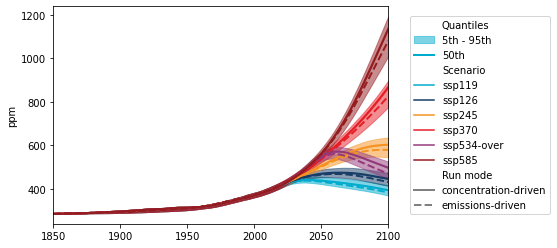

<IPython.core.display.Javascript object>

In [9]:
scenarios_to_plot = [
    "*ssp119",
    "*ssp126",
    #     "*ssp434",
    "*ssp245",
    #     "*ssp460",
    "*ssp370",
    "*ssp585",
    "*ssp534-over",
]
xlim = [1850, 2100]
ax, lh = summary_stats.filter(
    scenario=scenarios_to_plot, year=range(xlim[0], xlim[1] + 1)
).plumeplot(
    hue_var="Scenario",
    palette=utils.plotting.SCENARIO_PALETTE,
    style_var="run_mode",
    style_label="Run mode",
    pre_calculated=True,
    #     style_var="variable",
    time_axis="year",
)
ax.set_xlim(xlim)
ax.legend(handles=lh, loc="center left", bbox_to_anchor=(1.05, 0.5))